In [1]:
import sys
sys.path.insert(0, 'D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Classes')

import warnings
warnings.filterwarnings('ignore')

from models import ClassificationModel, EmbeddingsModel
from trainer import SiameseTrainerCombinedLoss, all_subjects
import torch

In [2]:
subjects_test = [all_subjects[0]]
subjects_train = [sub for sub in all_subjects if sub not in subjects_test]

In [17]:
trainer_hyperparameter = {
    "path": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl",
    "subjects_train": subjects_train,
    "subjects_test": subjects_test,
    "dataset_ignore_sample_subject_train": True,
    "dataset_ignore_sample_subject_test": False,
    "wandb": False,
    "log": True,
    "learning_rate": 0.001,
    "batch_size": 128,
    "batch_size_test": 128,
    "margin": 0.04,
    "lambda_loss": 0.1,
    "lr_steps": 2,
    "filter": [1, 2, 3, 4, 5, 6, -1, -2, -3, -4, -5, -6],
    "weight_decay": 0,
    "number_steps": 200,
    "number_steps_testing": None
}

model_embedding_hyperparameter = {
    "sigmoid": False,
    "dropout": 0.2,
    "layers": [207, 500, 64]
}

model_classifier_hyperparameter = {
    "dropout": 0.2,
    "layers": [64, 32]
}

filter = lambda data: data["label"].isin(trainer_hyperparameter["filter"])

In [18]:
classifier_model = ClassificationModel(model_classifier_hyperparameter)
embedding_model = EmbeddingsModel(model_embedding_hyperparameter)

#_ = embedding_model.load_state_dict(torch.load("D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Results\models\embedding_models\model_abs_acc_89.40.pth"))
trainer = SiameseTrainerCombinedLoss(trainer_hyperparameter, classifier_model, embedding_model, device="cuda:0", filter=filter)

In [21]:
trainer.trainloop(5)

{'epoch': 1, 'train': {'loss': tensor(0.6361), 'acc': tensor(0.5093)}, 'test': {'loss': tensor(0.6303), 'acc': tensor(0.5140)}}
{'epoch': 2, 'train': {'loss': tensor(0.6289), 'acc': tensor(0.5290)}, 'test': {'loss': tensor(0.6308), 'acc': tensor(0.5013)}}
{'epoch': 3, 'train': {'loss': tensor(0.6246), 'acc': tensor(0.5619)}, 'test': {'loss': tensor(0.6321), 'acc': tensor(0.4854)}}
{'epoch': 4, 'train': {'loss': tensor(0.6178), 'acc': tensor(0.5952)}, 'test': {'loss': tensor(0.6316), 'acc': tensor(0.5091)}}
{'epoch': 5, 'train': {'loss': tensor(0.6096), 'acc': tensor(0.6215)}, 'test': {'loss': tensor(0.6257), 'acc': tensor(0.5495)}}
{'epoch': 6, 'train': {'loss': tensor(0.6007), 'acc': tensor(0.6470)}, 'test': {'loss': tensor(0.6483), 'acc': tensor(0.4782)}}
{'epoch': 7, 'train': {'loss': tensor(0.5935), 'acc': tensor(0.6678)}, 'test': {'loss': tensor(0.6317), 'acc': tensor(0.5127)}}
{'epoch': 8, 'train': {'loss': tensor(0.5866), 'acc': tensor(0.6786)}, 'test': {'loss': tensor(0.6320), 

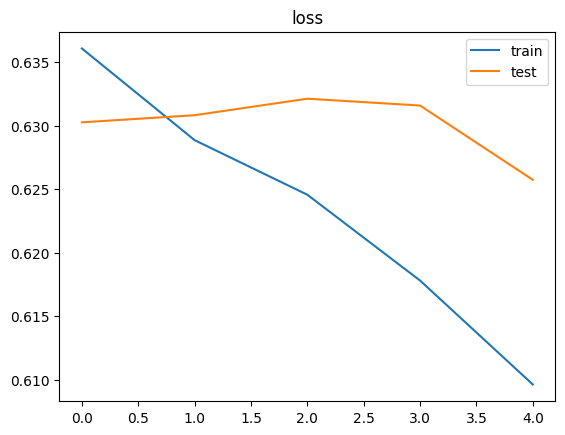

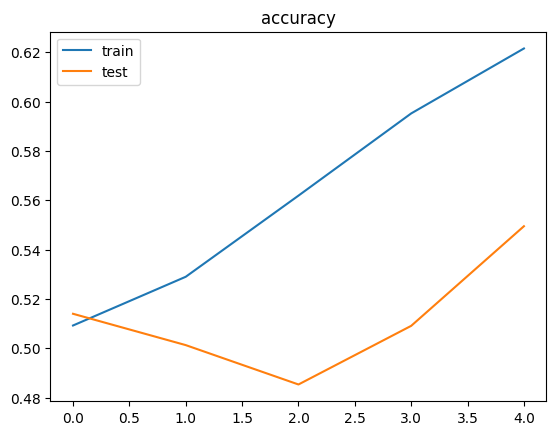

In [20]:
trainer.plot_history()